In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#Import data
df = pd.read_csv('layoffs.csv')
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2356,Blackbaud,Charleston,Other,500.0,0.14,NaN,Post-IPO,United States,NaN
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2/9/2023,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,3/30/2020,Series A,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,9/14/2021,Post-IPO,United States,339.0


# Data Cleaning

In [6]:
#Mengecek jumlah isi kolom yang kosong (NaN)
df.isnull().sum()

company                    0
location                   0
industry                   4
total_laid_off           740
percentage_laid_off      785
date                       1
stage                      6
country                    0
funds_raised_millions    209
dtype: int64

In [7]:
#Mengecek data kolom industry yang kosong (NaN) pada kolom industry
df[df['industry'].isna()==1]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
8,Airbnb,SF Bay Area,NaN,30.0,NaN,3/3/2023,Post-IPO,United States,6400.0
330,Bally's Interactive,Providence,NaN,NaN,0.15,1/18/2023,Post-IPO,United States,946.0
736,Juul,SF Bay Area,NaN,400.0,0.30,11/10/2022,Unknown,United States,1500.0
1595,Carvana,Phoenix,NaN,2500.0,0.12,5/10/2022,Post-IPO,United States,1600.0


In [8]:
# Menghitung frekuensi kemunculan karakter
char_counts = df['industry'].value_counts()
print("\nFrekuensi kemunculan karakter:")
print(char_counts)


Frekuensi kemunculan karakter:
Finance            284
Retail             195
Healthcare         183
Transportation     148
Food               141
Marketing          139
Other              129
Consumer           118
Real Estate        117
Crypto              99
Media               95
Education           93
Data                79
Security            74
HR                  66
Travel              66
Support             43
Infrastructure      43
Logistics           42
Sales               37
Product             35
Fitness             31
Recruiting          28
Hardware            17
Construction        16
Legal               13
Energy              12
Aerospace            6
Fin-Tech             3
Crypto Currency      2
Manufacturing        2
CryptoCurrency       1
Name: industry, dtype: int64


In [9]:
# Menentukan karakter yang paling sering muncul
most_frequent_industry = char_counts.idxmax()
print("\nKarakter yang paling sering muncul:")
print(most_frequent_industry)


Karakter yang paling sering muncul:
Finance


In [10]:
#Mengisi nilai kosong pada kolom industri dengan nilai yang sering muncul
df['industry'].fillna('Finance', inplace=True)

In [11]:
#Mengecek nilai kosong kolom industry
df.isnull().sum()

company                    0
location                   0
industry                   0
total_laid_off           740
percentage_laid_off      785
date                       1
stage                      6
country                    0
funds_raised_millions    209
dtype: int64

In [12]:
#Mengecek data yang kosong (NaN) pada kolom stage
df[df['stage'].isna()==1]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
392,Verily,SF Bay Area,Healthcare,250.0,0.15,1/11/2023,NaN,United States,3500.0
414,Relevel,Bengaluru,HR,40.0,0.20,1/10/2023,NaN,India,NaN
831,Advata,Seattle,Healthcare,32.0,0.21,10/28/2022,NaN,United States,NaN
837,Spreetail,Austin,Retail,NaN,NaN,10/27/2022,NaN,United States,NaN
1183,Gatherly,Atlanta,Marketing,NaN,0.50,7/31/2022,NaN,United States,NaN
1565,Zapp,London,Food,NaN,0.10,5/25/2022,NaN,United Kingdom,300.0


In [13]:
# Menghitung frekuensi kemunculan karakter
stage_counts = df['stage'].value_counts()
print("\nFrekuensi kemunculan karakter:")
print(stage_counts)


Frekuensi kemunculan karakter:
Post-IPO          428
Unknown           393
Series B          305
Series C          303
Series D          225
Series A          177
Acquired          172
Series E          125
Series F           65
Seed               65
Private Equity     38
Series H           24
Series G           15
Series J            8
Series I            7
Subsidiary          5
Name: stage, dtype: int64


In [14]:
#Mengisi nilai kosong pada kolom stage dengan nilai yang sering muncul
df['stage'].fillna('Post-IPO', inplace=True)

In [15]:
#Mengecek nilai kosong kolom stage
df.isnull().sum()

company                    0
location                   0
industry                   0
total_laid_off           740
percentage_laid_off      785
date                       1
stage                      0
country                    0
funds_raised_millions    209
dtype: int64

In [16]:
#Mengisi nilai kosong pada kolom funds_raised_millions dengan nilai tengah atau median
df['funds_raised_millions'].fillna(df['funds_raised_millions'].median(), inplace=True)

In [17]:
#Mengisi nilai kosong pada kolom total_laid_off dengan nilai rata rata
df['total_laid_off'].fillna(df['total_laid_off'].mean(), inplace=True)

In [19]:
#Mengisi nilai kosong pada kolom percentage_laid_off dengan nilai rata rata
df['percentage_laid_off'].fillna(df['percentage_laid_off'].mean(), inplace=True)

In [20]:
df.dropna(inplace=True)

In [21]:
#Mengecek nilai kosong kolom funds_raised_millions
df.isnull().sum()

company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off      0
date                     0
stage                    0
country                  0
funds_raised_millions    0
dtype: int64

In [45]:
# Membulatkan ke bilangan bulat terdekat
df['total_laid_off'] = df['total_laid_off'].round(0).astype(int)

<ipython-input-45-567d30be00ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_laid_off'] = df['total_laid_off'].round(0).astype(int)


In [47]:
# Mengatur tampilan dengan 2 angka di belakang koma
df=df.round({'percentage_laid_off': 2})

In [24]:
df.duplicated().sum()

5

In [28]:
# Menampilkan data duplikat
df[df.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
1492,Cazoo,London,Transportation,750,0.150000,6/7/2022,Post-IPO,United Kingdom,2000.0
2357,Yahoo,SF Bay Area,Consumer,1600,0.200000,2/9/2023,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70,0.300000,3/30/2020,Series A,Israel,45.0
2359,Casper,New York City,Retail,238,0.257917,9/14/2021,Post-IPO,United States,339.0
2360,Wildlife Studios,Sao Paulo,Consumer,300,0.200000,11/28/2022,Unknown,Brazil,260.0


In [29]:
df=df.drop_duplicates()

In [30]:
df.duplicated().sum()

0

In [31]:
print(df.dtypes)

company                   object
location                  object
industry                  object
total_laid_off             int32
percentage_laid_off      float64
date                      object
stage                     object
country                   object
funds_raised_millions    float64
dtype: object


In [48]:
df['date'] = pd.to_datetime(df['date'])
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400,0.26,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120,0.26,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340,0.15,2023-03-03,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2351,Service,Los Angeles,Travel,238,1.00,2020-03-16,Seed,United States,5.1
2352,HopSkipDrive,Los Angeles,Transportation,8,0.10,2020-03-13,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6,0.75,2020-03-13,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20,0.40,2020-03-12,Series C,United States,90.0


In [33]:
print(df.dtypes)

company                          object
location                         object
industry                         object
total_laid_off                    int32
percentage_laid_off             float64
date                     datetime64[ns]
stage                            object
country                          object
funds_raised_millions           float64
dtype: object


In [51]:
sum_by_location = df.groupby('location')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)
# Menampilkan hasil
print("\nUrutan total diberhentikan tertinggi:")
print(sum_by_location)


Urutan total diberhentikan tertinggi:
          location  total_laid_off
147    SF Bay Area          168947
125  New York City           47452
158        Seattle           41883
17       Bengaluru           24405
24          Boston           19591
..             ...             ...
129        Orlando              24
44            Cork              21
86            Kiel              21
83     Kansas City              20
76    Indianapolis               5

[190 rows x 2 columns]


In [49]:
sum_by_company = df.groupby('company')['funds_raised_millions'].sum().reset_index().sort_values(by='funds_raised_millions', ascending=False)
# Menampilkan hasil
print("\nUrutan Pendapatan Tertinggi:")
print(sum_by_company)


Urutan Pendapatan Tertinggi:
         company  funds_raised_millions
1083     Netflix               487600.0
1688        Uber               123500.0
1684     Twitter                44400.0
1783      WeWork                43500.0
1784     WeWork                 41700.0
...          ...                    ...
493         Drip                    0.0
1879   divvyDOSE                    0.0
1547  SuperLearn                    0.0
318    Chessable                    0.0
174       BitMEX                    0.0

[1892 rows x 2 columns]


# Data Visualization

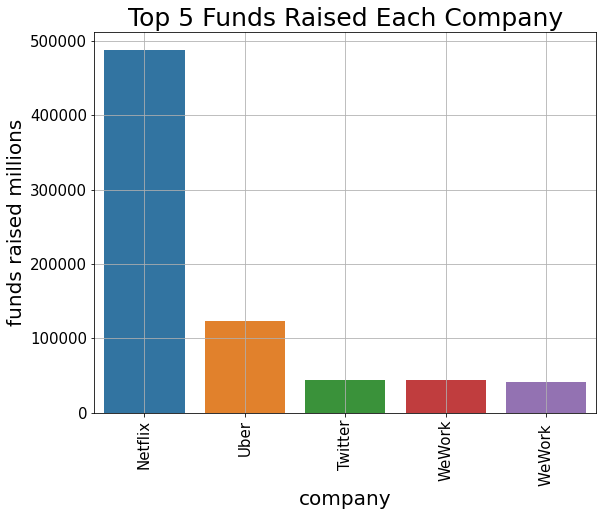

In [43]:
plt.figure(figsize=(9, 7))
sns.barplot(data=sum_by_category.head(), x='company', y='funds_raised_millions')
plt.xlabel('company', size=20)
plt.ylabel('funds raised millions', size= 20)
plt.title('Top 5 Funds Raised Each Company', size=25)
plt.xticks(rotation=90, size=15) 
plt.yticks(size=15)
plt.grid(True)
plt.show()

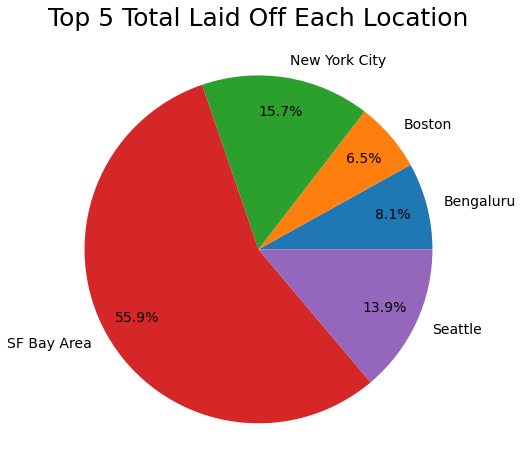

In [53]:
plt.figure(figsize=(8, 8))
laid_off = sum_by_location.head().groupby("location")["total_laid_off"].sum().reset_index()
wedges, texts, autotexts = plt.pie(laid_off["total_laid_off"], labels=laid_off["location"], autopct="%1.1f%%", pctdistance=0.8,textprops=dict(color="k"))
for text in texts:
    text.set_fontsize(14)
for autotext in autotexts:
    autotext.set_fontsize(14)
plt.title('Top 5 Total Laid Off Each Location', size=25)
plt.show()